## Our main goal is to study whether Reynold's number can be used to describe turbulence in a changing climate.

### Import library

In [1]:
# CDS API
import cdsapi

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

# Disable warnings for data download via API
import urllib3 
urllib3.disable_warnings()
print("it worked")

it worked


### Enter my CDS API key

In [2]:
URL = 'https://cds.climate.copernicus.eu/api/v2'
KEY = '11bcbbe0-2bfc-4a14-a31a-5613894ca7da'

Here we specify a data directory in which we will download our data and all output files that we will generate:

In [3]:
DATADIR = './'

 The data we need for this tutorial is the ERA5 monthly averaged data on single levels from 1979 to present.
 https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=overview
 Select Download data and corresponding variables we desire. For now, 10m u-compound of wind, 10m v-compound of wind
 and 2m Temperature are needed, with product Type: Monthly averaged reanalysis.
 Year/Monthes: all years and all monthes available.

Now, we mainly focus on analysis U, the magnitude of 10m velovity of wind. i.e U = sqrt(u^2+v^2)
Plot the graph: spatial graph of U, and T-series of U.
compare them with Temperature plots...
For now, the area is Europe.

In [296]:
c = cdsapi.Client()
c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'product_type': 'monthly_averaged_reanalysis',
        'variable': [
            '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_temperature',
        ],
        'year': [
            '1940', '1941', '1942',
            '1943', '1944', '1945',
            '1946', '1947', '1948',
            '1949', '1950', '1951',
            '1952', '1953', '1954',
            '1955', '1956', '1957',
            '1958', '1959', '1960',
            '1961', '1962', '1963',
            '1964', '1965', '1966',
            '1967', '1968', '1969',
            '1970', '1971', '1972',
            '1973', '1974', '1975',
            '1976', '1977', '1978',
            '1979', '1980', '1981',
            '1982', '1983', '1984',
            '1985', '1986', '1987',
            '1988', '1989', '1990',
            '1991', '1992', '1993',
            '1994', '1995', '1996',
            '1997', '1998', '1999',
            '2000', '2001', '2002',
            '2003', '2004', '2005',
            '2006', '2007', '2008',
            '2009', '2010', '2011',
            '2012', '2013', '2014',
            '2015', '2016', '2017',
            '2018', '2019', '2020',
            '2021', '2022', 
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': '00:00',
        'area': [
            72, -25, 34,
            40,
        ],
        'format': 'netcdf',
    },
    f'{DATADIR}era5_monthly_t10m_eur.nc')
#     },
#     'download.nc')

2023-10-30 02:08:38,791 INFO Welcome to the CDS
2023-10-30 02:08:38,792 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2023-10-30 02:08:38,909 INFO Request is queued
2023-10-30 02:12:57,215 INFO Request is completed
2023-10-30 02:12:57,216 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data2/adaptor.mars.internal-1698631930.1906366-20791-3-9f93ac3a-1d51-454d-b612-8d7156969f6a.nc to ./era5_monthly_t10m_eur.nc (227.6M)
2023-10-30 02:13:12,994 INFO Download rate 14.4M/s                              


Result(content_length=238646824,content_type=application/x-netcdf,location=https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data2/adaptor.mars.internal-1698631930.1906366-20791-3-9f93ac3a-1d51-454d-b612-8d7156969f6a.nc)

In [4]:
# t2m = f'{DATADIR}era5_monthly_t2m_eur.nc'
t10m = f'{DATADIR}era5_monthly_t10m_eur.nc'

In [5]:
# Create Xarray Dataset
ds = xr.open_dataset(t10m)

In [6]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 261, latitude: 153, time: 996)
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-30 02:12:18 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

### convert longitude to [-180, 180] grid

In [7]:
ds_180 = ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180)).sortby('longitude')

In [8]:
# Create Xarray Data Array
da = ds_180['t2m']

In [9]:
da

<xarray.DataArray 't2m' (time: 996, latitude: 153, longitude: 261)>
[39773268 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
Attributes:
    units:      K
    long_name:  2 metre temperature

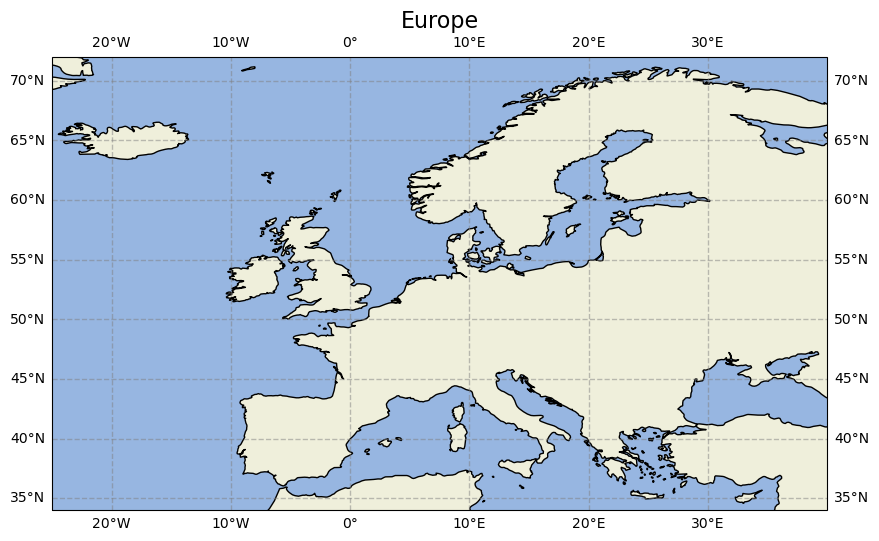

In [10]:
extend = [25, 40, 34, 72]
fig = plt.figure(figsize = [10,7])
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
# Set the figure title, add lat/lon grid and coastlines
ax.set_title('Europe', fontsize=16)
ax.gridlines(draw_labels=True, dms = True, linewidth=1, color='gray', alpha=0.5, linestyle='--') 
ax.coastlines(color='black', resolution = '50m')
ax.set_extent([-25, 40, 34, 72], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND)


# Save the figure
fig.savefig(f'{DATADIR}European map area')

In [11]:
da_degc = da - 273.15

In [12]:
da_degc = da_degc.assign_attrs(da.attrs)
da_degc.attrs['units'] = '° C'

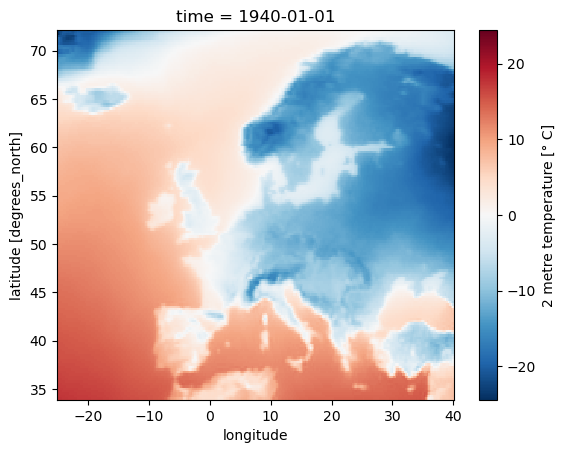

In [13]:
da_degc[0,:,:].plot()

In [14]:
yearly_mean = da_degc.groupby('time.year').mean(keep_attrs=True)

In [15]:
ref = yearly_mean.where((yearly_mean.year > 1990) & (yearly_mean.year < 2021), drop=True)

In [16]:
ref_mean = ref.mean(dim="year", keep_attrs=True)

In [17]:
ref_anom = yearly_mean - ref_mean

In [18]:
print(ref_mean)

<xarray.DataArray 't2m' (latitude: 153, longitude: 261)>
array([[-13.0509   , -11.423041 , -10.442881 , ...,   1.439865 ,
          1.438771 ,   1.4214866],
       [-13.385781 , -11.727275 , -10.074345 , ...,   1.6177957,
          1.6005288,   1.5829108],
       [ -9.356688 ,  -9.119257 ,  -8.715956 , ...,   1.7936522,
          1.783932 ,   1.7696682],
       ...,
       [ 19.475454 ,  19.44566  ,  19.419441 , ...,  20.093624 ,
         20.371143 ,  20.641445 ],
       [ 19.55795  ,  19.52997  ,  19.503279 , ...,  19.65317  ,
         20.02097  ,  20.372755 ],
       [ 19.633978 ,  19.610828 ,  19.586248 , ...,  19.340017 ,
         19.702217 ,  20.13352  ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0
Attributes:
    units:      ° C
    long_name:  2 metre temperature


In [19]:
t2m_2022 = yearly_mean.sel(year=2022)

In [20]:
anom_2022 = t2m_2022 - ref_mean

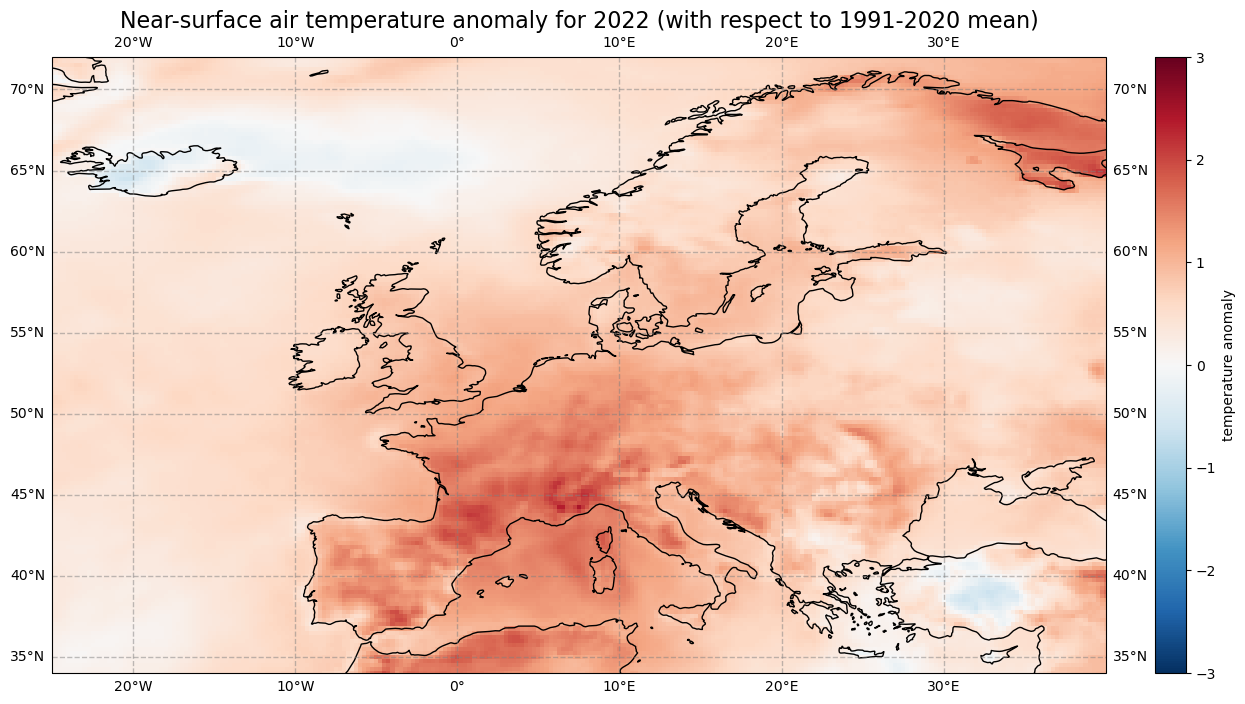

In [21]:
# create the figure panel and the map using the Cartopy PlateCarree projection
fig, ax = plt.subplots(1, 1, figsize = (16, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data
im = plt.pcolormesh(anom_2022.longitude, anom_2022.latitude, anom_2022, cmap='RdBu_r', vmin=-3, vmax=3) 

# Set the figure title, add lat/lon grid and coastlines
ax.set_title('Near-surface air temperature anomaly for 2022 (with respect to 1991-2020 mean)', fontsize=16)
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') 
ax.coastlines(color='black')
ax.set_extent([-25, 40, 34, 72], crs=ccrs.PlateCarree())

# Specify the colourbar
cbar = plt.colorbar(im,fraction=0.05, pad=0.04)
cbar.set_label('temperature anomaly') 

# Save the figure
fig.savefig(f'{DATADIR}2022_anomaly_eur.png')

In [22]:
t2m_1960 = yearly_mean.sel(year=1960)

In [23]:
anom_1960 = t2m_1960 - ref_mean

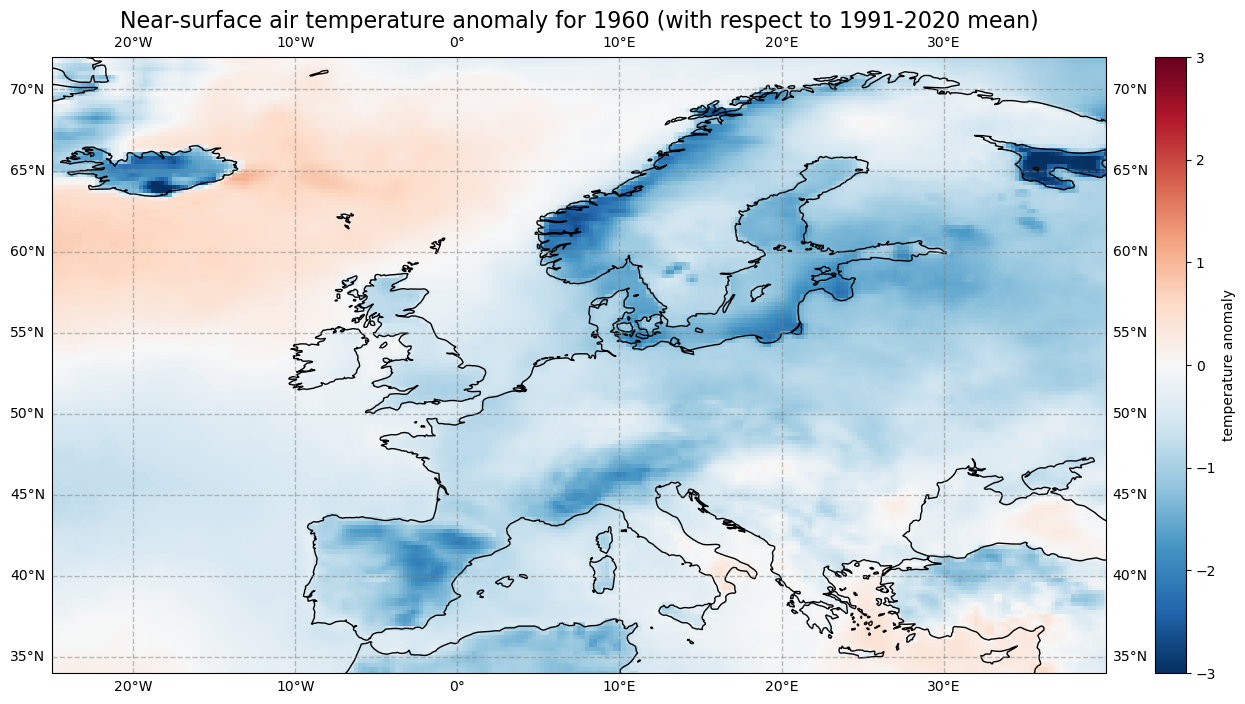

In [24]:
# create the figure panel and the map using the Cartopy PlateCarree projection
fig, ax = plt.subplots(1, 1, figsize = (16, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data
im = plt.pcolormesh(anom_1960.longitude, anom_1960.latitude, anom_1960, cmap='RdBu_r', vmin=-3, vmax=3) 

# Set the figure title, add lat/lon grid and coastlines
ax.set_title('Near-surface air temperature anomaly for 1960 (with respect to 1991-2020 mean)', fontsize=16)
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') 
ax.coastlines(color='black')
ax.set_extent([-25, 40, 34, 72], crs=ccrs.PlateCarree())

# Specify the colourbar
cbar = plt.colorbar(im,fraction=0.05, pad=0.04)
cbar.set_label('temperature anomaly') 

# Save the figure
fig.savefig(f'{DATADIR}1960_anomaly_eur.png')

### Now, we study the temperature trend with respect to years.

In [25]:
weights = np.cos(np.deg2rad(da_degc.latitude))
weights.name = "weights"
da_weighted = da_degc.weighted(weights)
da_mean = da_weighted.mean(["longitude", "latitude"])

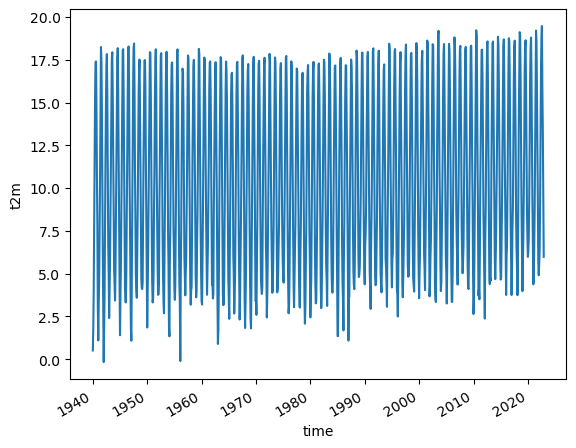

In [26]:
 da_mean.plot()

In [27]:
da_yearly = da_mean.groupby('time.year').mean()

In [28]:
print(da_yearly)

<xarray.DataArray 't2m' (year: 83)>
array([ 9.414712 ,  9.360532 ,  9.48376  , 10.365261 , 10.164921 ,
       10.15028  , 10.260215 , 10.107459 , 10.241366 , 10.404096 ,
       10.320191 , 10.151041 , 10.131134 , 10.308192 ,  9.9319   ,
       10.084274 ,  9.336907 , 10.304301 , 10.041253 , 10.339267 ,
       10.361475 , 10.60279  ,  9.909856 ,  9.695141 , 10.044749 ,
        9.644044 , 10.032302 , 10.131747 ,  9.875071 ,  9.563243 ,
        9.9392395,  9.958123 , 10.061372 ,  9.934938 , 10.275651 ,
       10.373719 ,  9.69871  , 10.020738 ,  9.623065 ,  9.847445 ,
        9.743902 , 10.056069 , 10.189618 , 10.280116 , 10.156382 ,
        9.614684 ,  9.888143 ,  9.766717 , 10.262621 , 10.842406 ,
       10.854237 , 10.288981 , 10.340505 ,  9.995461 , 10.587869 ,
       10.593564 , 10.037996 , 10.549053 , 10.539417 , 10.882365 ,
       10.899943 , 10.758853 , 10.946488 , 10.909106 , 10.82729  ,
       10.785312 , 10.990386 , 11.163993 , 11.056987 , 10.944924 ,
       10.575108 , 10.9753

In [29]:
da_q = da_yearly.mean()

In [30]:
print(da_q)

<xarray.DataArray 't2m' ()>
array(10.370802, dtype=float32)


In [31]:
print(da_yearly.sel(year=2020))

<xarray.DataArray 't2m' ()>
array(11.625985, dtype=float32)
Coordinates:
    year     int64 2020


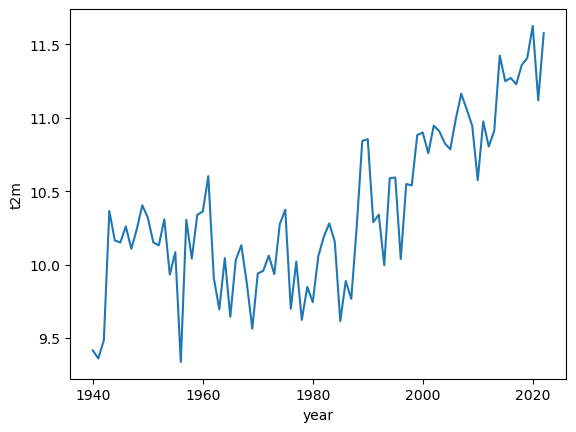

In [32]:
da_yearly.plot()

In [33]:
da_subset = da_yearly.where((da_yearly.year > 1990) & (da_yearly.year < 2021), drop=True)
da_clim = da_subset.mean()
da_anom = da_yearly - da_clim

In [34]:
da_anom

<xarray.DataArray 't2m' (year: 83)>
array([-1.4496517 , -1.5038319 , -1.3806038 , -0.4991026 , -0.69944286,
       -0.7140837 , -0.60414886, -0.7569046 , -0.6229973 , -0.46026802,
       -0.5441723 , -0.71332264, -0.73322964, -0.5561714 , -0.93246365,
       -0.7800894 , -1.5274563 , -0.5600624 , -0.8231106 , -0.5250969 ,
       -0.5028887 , -0.2615738 , -0.9545078 , -1.1692228 , -0.8196144 ,
       -1.2203197 , -0.83206177, -0.7326164 , -0.9892931 , -1.3011208 ,
       -0.92512417, -0.90624046, -0.80299187, -0.92942524, -0.5887127 ,
       -0.49064445, -1.1656532 , -0.843626  , -1.2412987 , -1.0169191 ,
       -1.1204615 , -0.8082943 , -0.67474556, -0.5842476 , -0.70798206,
       -1.2496796 , -0.9762211 , -1.0976467 , -0.60174274, -0.0219574 ,
       -0.01012707, -0.57538223, -0.523859  , -0.8689022 , -0.27649498,
       -0.27079964, -0.8263674 , -0.31531048, -0.3249464 ,  0.01800156,
        0.03557968, -0.10551071,  0.08212471,  0.04474258, -0.03707409,
       -0.07905197,  0.12602234,  0.2996292 ,  0.19262314,  0.08056068,
       -0.2892561 ,  0.11103249, -0.05987549,  0.0470705 ,  0.5594187 ,
        0.38538742,  0.4070902 ,  0.36426258,  0.49518204,  0.5424633 ,
        0.7616215 ,  0.25528145,  0.7122698 ], dtype=float32)
Coordinates:
  * year     (year) int64 1940 1941 1942 1943 1944 ... 2018 2019 2020 2021 2022

In [35]:
df = da_anom.to_dataframe()
df['positive'] = df['t2m'] > 0
df.head() # show only first five rows

t2m  positive
year                    
1940 -1.449652     False
1941 -1.503832     False
1942 -1.380604     False
1943 -0.499103     False
1944 -0.699443     False

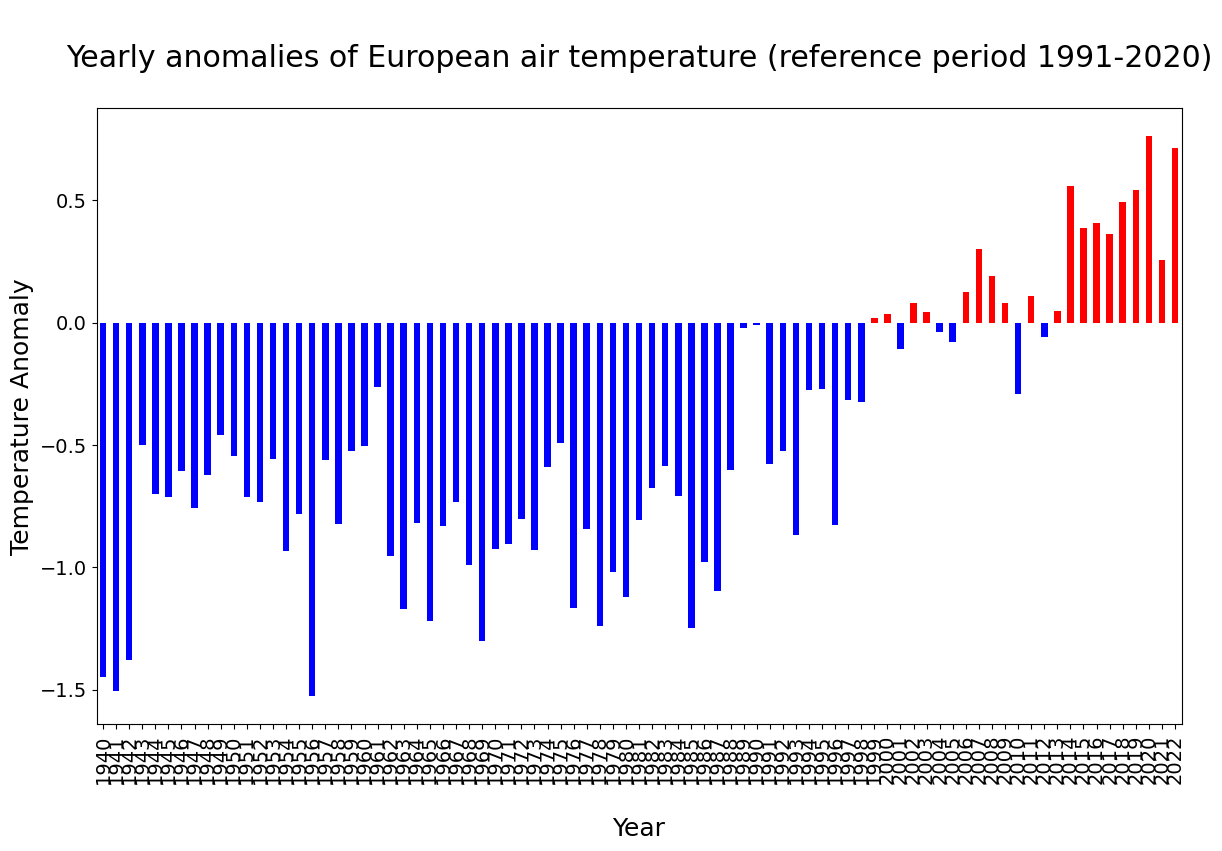

In [36]:
plt.rcParams.update({'font.size': 18}) # must set in top
df['t2m'].plot(
    figsize=(14,8),
    kind='bar',
    color=df.positive.map({True: 'red', False: 'blue'}),
    fontsize=14,
    xlabel='\nYear',
    ylabel='Temperature Anomaly',
    title='\nYearly anomalies of European air temperature (reference period 1991-2020)\n',
    )
plt.savefig(f'{DATADIR}t2m_anom_bar.png')

In [37]:
da_subset1 = da_yearly.where((da_yearly.year > 1960) & (da_yearly.year < 1980), drop=True)
da_clim1 = da_subset1.mean()
da_anom1 = da_yearly - da_clim1

In [38]:
df1 = da_anom1.to_dataframe()
df1['positive'] = df1['t2m'] > 0
df1.head() # show only first five rows

t2m  positive
year                    
1940 -0.544864     False
1941 -0.599044     False
1942 -0.475816     False
1943  0.405685      True
1944  0.205345      True

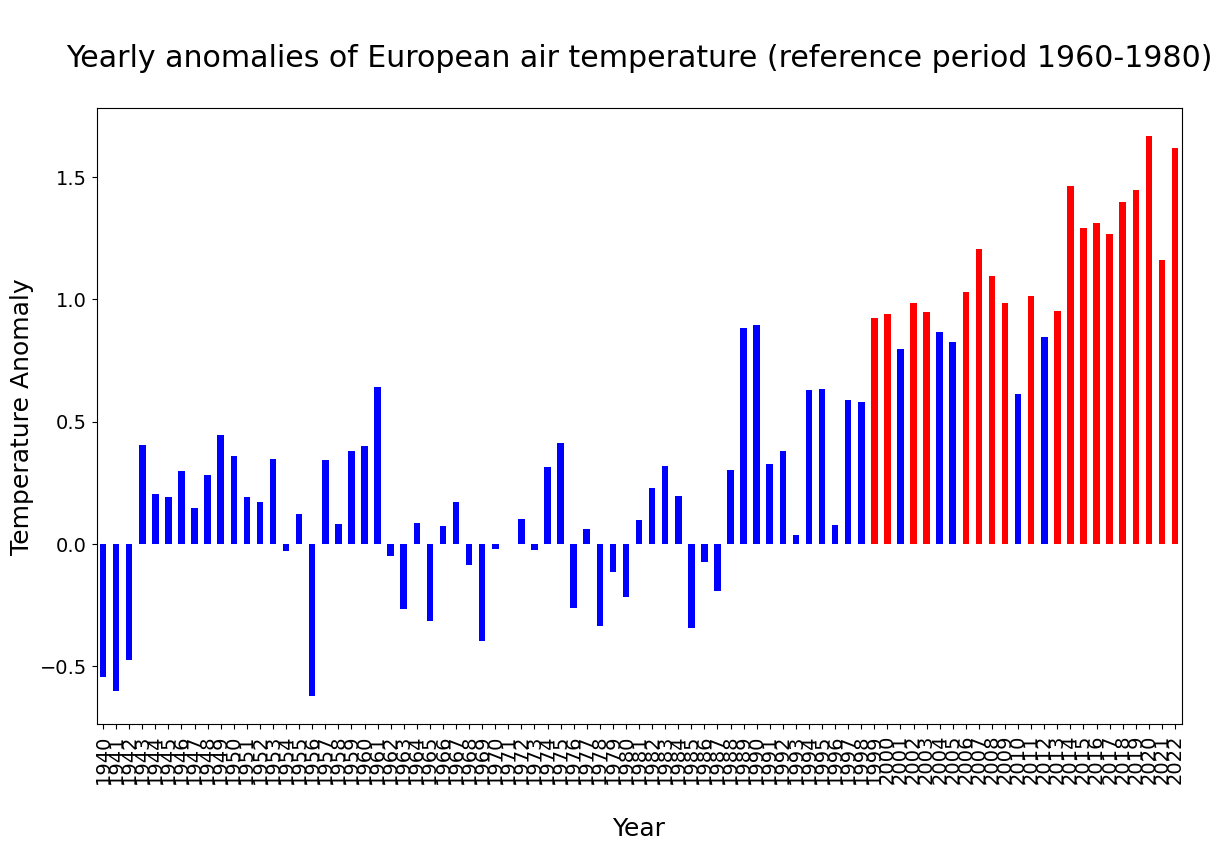

In [39]:
plt.rcParams.update({'font.size': 18}) # must set in top
df1['t2m'].plot(
    figsize=(14,8),
    kind='bar',
    color=df.positive.map({True: 'red', False: 'blue'}),
    fontsize=14,
    xlabel='\nYear',
    ylabel='Temperature Anomaly',
    title='\nYearly anomalies of European air temperature (reference period 1960-1980)\n',
    )
plt.savefig(f'{DATADIR}t2m_anom_bar_1960-1980.png')

In [40]:
# Create Xarray Data Array
da_1 = ds_180['u10']

In [41]:
da_1

<xarray.DataArray 'u10' (time: 996, latitude: 153, longitude: 261)>
[39773268 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
Attributes:
    units:      m s**-1
    long_name:  10 metre U wind component

In [42]:
print(da_1)

<xarray.DataArray 'u10' (time: 996, latitude: 153, longitude: 261)>
[39773268 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
Attributes:
    units:      m s**-1
    long_name:  10 metre U wind component


In [43]:
da_2 = ds_180['v10']

In [44]:
print(da_2)

<xarray.DataArray 'v10' (time: 996, latitude: 153, longitude: 261)>
[39773268 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
Attributes:
    units:      m s**-1
    long_name:  10 metre V wind component


In [45]:
da_sum = (da_1)**2+(da_2)**2

In [46]:
da_mag = np.sqrt(da_sum)

In [47]:
da_mag

<xarray.DataArray (time: 996, latitude: 153, longitude: 261)>
array([[[1.6182097 , 1.5624177 , 1.619898  , ..., 5.125296  ,
         5.148087  , 5.1917944 ],
        [2.2126553 , 1.9025248 , 1.5963087 , ..., 5.1787777 ,
         5.224285  , 5.2708564 ],
        [2.2650113 , 2.052342  , 1.7956569 , ..., 5.2760844 ,
         5.338231  , 5.397853  ],
        ...,
        [3.3052416 , 3.2420897 , 3.179454  , ..., 1.7377645 ,
         1.6947833 , 1.6299592 ],
        [3.1994674 , 3.1360521 , 3.071869  , ..., 1.9654442 ,
         1.9155328 , 1.8205858 ],
        [3.0964077 , 3.0344265 , 2.9832995 , ..., 2.073991  ,
         2.0430737 , 1.9824619 ]],

       [[1.663291  , 1.6412789 , 1.761031  , ..., 5.761575  ,
         5.7778573 , 5.824196  ],
        [2.273894  , 1.971846  , 1.676341  , ..., 5.807094  ,
         5.8569713 , 5.9080353 ],
        [2.427423  , 2.1676815 , 1.8701335 , ..., 5.771404  ,
         5.8067465 , 5.845346  ],
...
        [2.0199878 , 1.9514617 , 1.905762  , ..., 0.7312574 ,
         0.5890852 , 0.5345583 ],
        [1.7495891 , 1.6957515 , 1.6560242 , ..., 0.7945184 ,
         0.7081451 , 0.6616662 ],
        [1.470275  , 1.4321657 , 1.3936299 , ..., 0.8287891 ,
         0.7720634 , 0.7652595 ]],

       [[1.7333045 , 1.6773645 , 1.8409019 , ..., 4.5141544 ,
         4.475291  , 4.459433  ],
        [2.431387  , 2.1156743 , 1.8058034 , ..., 4.6621184 ,
         4.6457834 , 4.6296353 ],
        [2.692876  , 2.3186147 , 1.9428802 , ..., 4.7151394 ,
         4.701444  , 4.6903105 ],
        ...,
        [5.560528  , 5.5331564 , 5.484983  , ..., 0.58469135,
         0.4942604 , 0.5148491 ],
        [5.4805007 , 5.463564  , 5.4374924 , ..., 0.50393593,
         0.48367593, 0.48236412],
        [5.412835  , 5.410729  , 5.4106183 , ..., 0.4741152 ,
         0.44951332, 0.49999145]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01

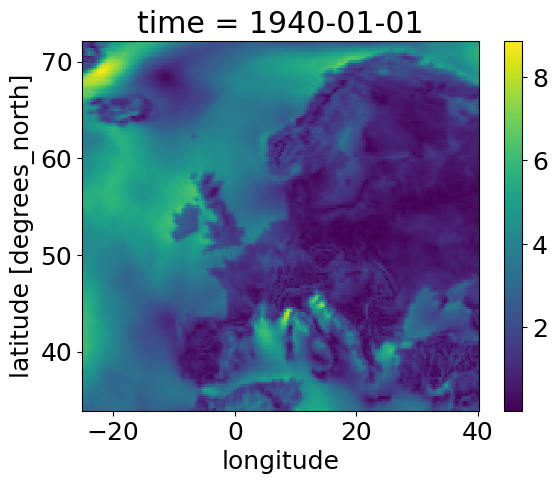

In [48]:
da_mag[0,:,:].plot()

In [49]:
mag_yearly_mean = da_mag.groupby('time.year').mean(keep_attrs=True)

In [50]:
ref_mag = mag_yearly_mean.where((mag_yearly_mean.year > 1990) & (mag_yearly_mean.year < 2021), drop=True)

In [51]:
ref_mag_mean = ref_mag.mean(dim="year", keep_attrs=True)

In [52]:
ref_mag_anom = mag_yearly_mean - ref_mag_mean

In [53]:
print(ref_mag_mean)

<xarray.DataArray (latitude: 153, longitude: 261)>
array([[1.2776242, 1.2026762, 1.3029625, ..., 2.6261852, 2.629022 ,
        2.6414673],
       [1.9743332, 1.698806 , 1.4267243, ..., 2.6381924, 2.6509018,
        2.6642213],
       [1.9921378, 1.8299918, 1.6405948, ..., 2.6476502, 2.6578345,
        2.6690924],
       ...,
       [2.9670634, 2.9979198, 3.0236363, ..., 2.3190806, 2.3922098,
        2.461118 ],
       [3.0008316, 3.031109 , 3.054035 , ..., 2.3959534, 2.4291682,
        2.4104054],
       [3.0381787, 3.067018 , 3.0978281, ..., 2.3561819, 2.3777204,
        2.375631 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0


In [54]:
mag_2022 = mag_yearly_mean.sel(year=2022)

In [55]:
mag_anom_2022 = mag_2022 - ref_mag_mean

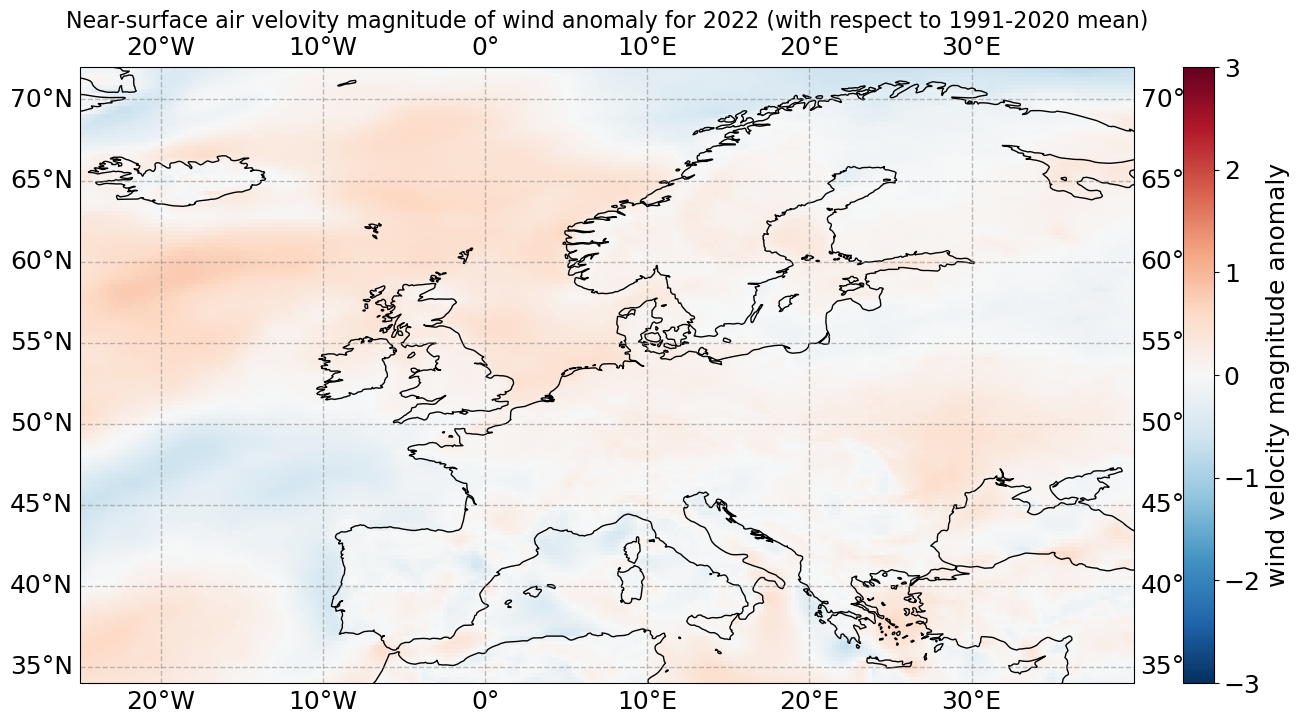

In [56]:
# create the figure panel and the map using the Cartopy PlateCarree projection
fig, ax = plt.subplots(1, 1, figsize = (16, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data
im = plt.pcolormesh(mag_anom_2022.longitude, mag_anom_2022.latitude, mag_anom_2022, cmap='RdBu_r', vmin=-3, vmax=3) 

# Set the figure title, add lat/lon grid and coastlines
ax.set_title('Near-surface air velovity magnitude of wind anomaly for 2022 (with respect to 1991-2020 mean)', fontsize=16)
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') 
ax.coastlines(color='black')
ax.set_extent([-25, 40, 34, 72], crs=ccrs.PlateCarree())

# Specify the colourbar
cbar = plt.colorbar(im,fraction=0.05, pad=0.04)
cbar.set_label('wind velocity magnitude anomaly') 

# Save the figure
fig.savefig(f'{DATADIR}2022_vmag_anomaly_eur.png')

###

In [57]:
mag_1960 = mag_yearly_mean.sel(year=1960)

In [58]:
mag_anom_1960 = mag_1960 - ref_mag_mean

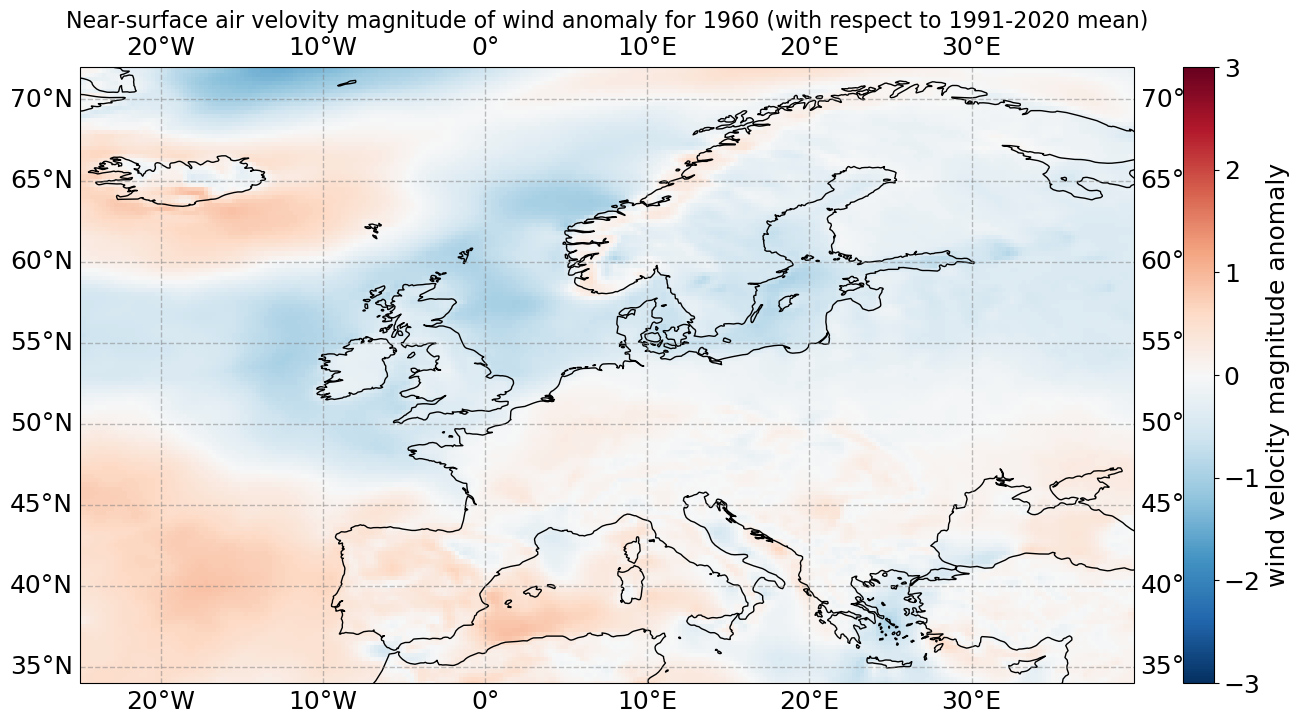

In [59]:
# create the figure panel and the map using the Cartopy PlateCarree projection
fig, ax = plt.subplots(1, 1, figsize = (16, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data
im = plt.pcolormesh(mag_anom_1960.longitude, mag_anom_1960.latitude, mag_anom_1960, cmap='RdBu_r', vmin=-3, vmax=3) 

# Set the figure title, add lat/lon grid and coastlines
ax.set_title('Near-surface air velovity magnitude of wind anomaly for 1960 (with respect to 1991-2020 mean)', fontsize=16)
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') 
ax.coastlines(color='black')
ax.set_extent([-25, 40, 34, 72], crs=ccrs.PlateCarree())

# Specify the colourbar
cbar = plt.colorbar(im,fraction=0.05, pad=0.04)
cbar.set_label('wind velocity magnitude anomaly') 

# Save the figure
fig.savefig(f'{DATADIR}1960_vmag_anomaly_eur.png')

In [60]:
# weights = np.cos(np.deg2rad(da_degc.latitude))
# weights.name = "weights"
da_mag_weighted = da_mag.weighted(weights)
da_mag_mean = da_mag_weighted.mean(["longitude", "latitude"])

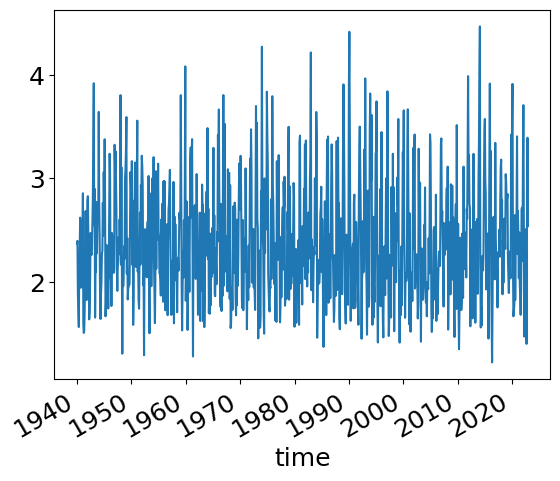

In [61]:
da_mag_mean.plot()    #monthly averaged

In [62]:
da_mag_yearly = da_mag_mean.groupby('time.year').mean()

### yearly average:

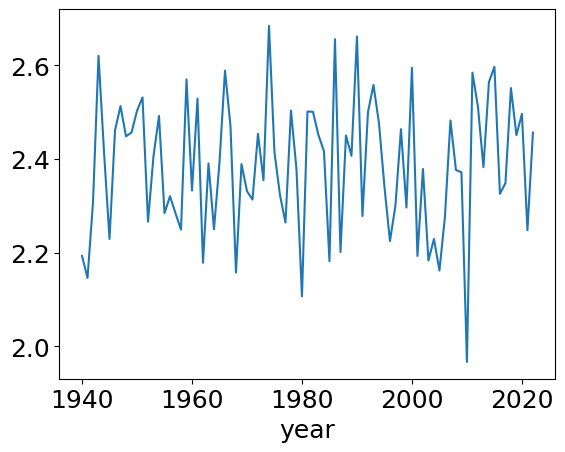

In [63]:
da_mag_yearly.plot()

In [64]:
da_mag_subset = da_mag_yearly.where((da_mag_yearly.year > 1990) & (da_mag_yearly.year < 2021), drop=True)
da_mag_clim = da_mag_subset.mean()
da_mag_anom = da_mag_yearly - da_mag_clim

In [65]:
da_mag_anom_n = da_mag_anom.rename("magnitude")

In [66]:
da_mag_anom_n

<xarray.DataArray 'magnitude' (year: 83)>
array([-0.18894863, -0.23594356, -0.07440805,  0.23790765,  0.03304935,
       -0.15276861,  0.07877874,  0.13067698,  0.06619763,  0.07414794,
        0.12045836,  0.14917302, -0.11598086,  0.02427649,  0.10954022,
       -0.09777975, -0.06163383, -0.09805441, -0.13275075,  0.1875391 ,
       -0.04955268,  0.14661694, -0.20352578,  0.00830317, -0.13191724,
        0.01029301,  0.20620847,  0.08780217, -0.22450614,  0.00686002,
       -0.05094957, -0.06869364,  0.07143354, -0.02730393,  0.301641  ,
        0.03204155, -0.05912519, -0.11780286,  0.12092781, -0.00430703,
       -0.27528954,  0.11901689,  0.11844945,  0.06870627,  0.03445983,
       -0.20031524,  0.27344394, -0.18053484,  0.06784892,  0.024611  ,
        0.27910972, -0.10381007,  0.11743188,  0.17577863,  0.09456229,
       -0.04164219, -0.15724945, -0.08123875,  0.08128452, -0.08572459,
        0.21225762, -0.18906713, -0.00339913, -0.19874501, -0.1527865 ,
       -0.22019362, -0.10535407,  0.09997153, -0.00564504, -0.01066184,
       -0.41513646,  0.20184255,  0.12940764,  0.00041723,  0.18189788,
        0.21442151, -0.05652452, -0.03382373,  0.16904569,  0.06861401,
        0.11406732, -0.13413477,  0.07406545], dtype=float32)
Coordinates:
  * year     (year) int64 1940 1941 1942 1943 1944 ... 2018 2019 2020 2021 2022

In [67]:
df = da_mag_anom_n.to_dataframe()
df['positive'] = df['magnitude'] > 0
df.head() # show only first five rows

magnitude  positive
year                     
1940  -0.188949     False
1941  -0.235944     False
1942  -0.074408     False
1943   0.237908      True
1944   0.033049      True

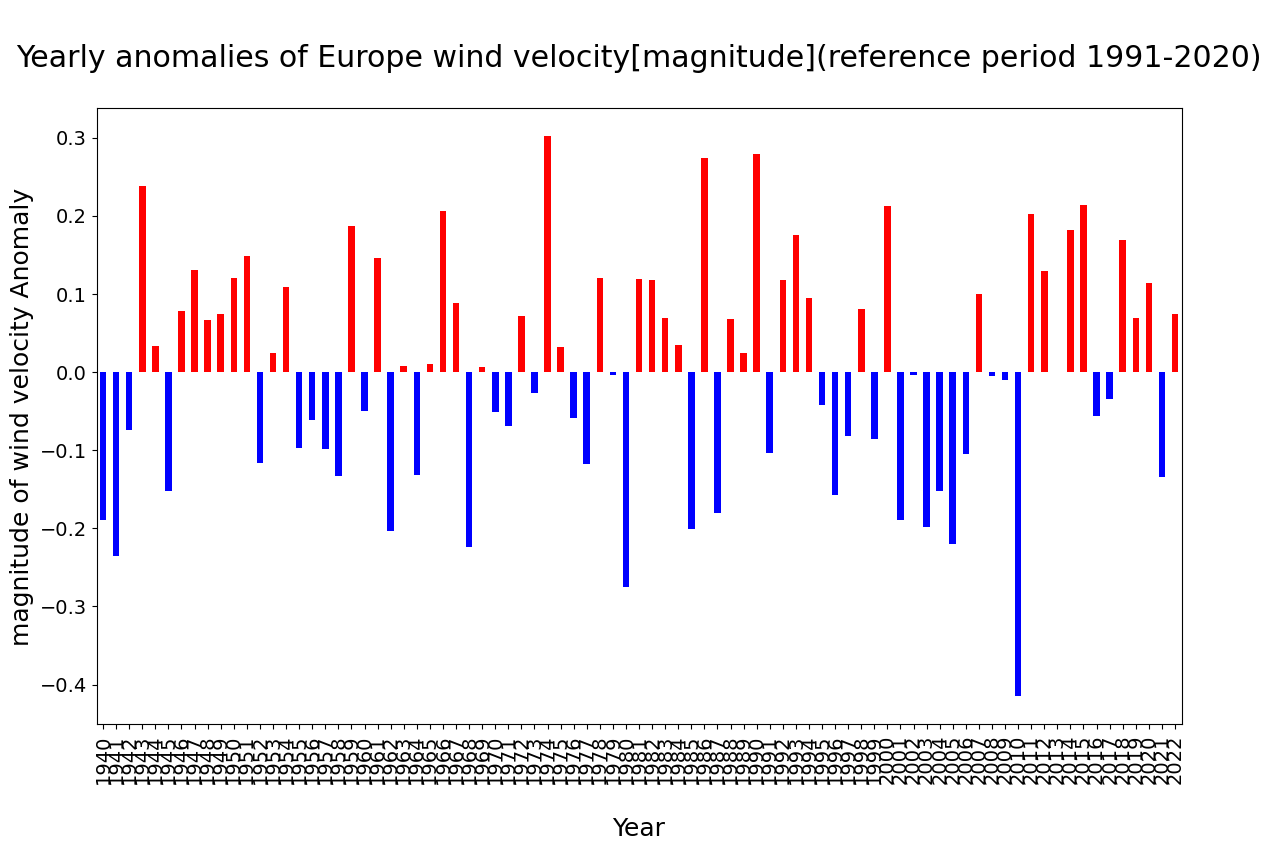

In [68]:
plt.rcParams.update({'font.size': 18}) # must set in top
df['magnitude'].plot(
    figsize=(14,8),
    kind='bar',
    color=df.positive.map({True: 'red', False: 'blue'}),
    fontsize=14,
    xlabel='\nYear',
    ylabel='magnitude of wind velocity Anomaly',
    title='\nYearly anomalies of Europe wind velocity[magnitude](reference period 1991-2020)\n',
    )
plt.savefig(f'{DATADIR}uv10m_anom_bar.png')

In [69]:
da_mag_subset1 = da_mag_yearly.where((da_mag_yearly.year > 1940) & (da_mag_yearly.year < 1960), drop=True)
da_mag_clim1 = da_mag_subset1.mean()
da_mag_anom1 = da_mag_yearly - da_mag_clim1

In [70]:
da_mag_anom_n1 = da_mag_anom1.rename("magnitude")

In [71]:
dp = da_mag_anom_n1.to_dataframe()
dp['positive'] = dp['magnitude'] > 0
dp.head() # show only first five rows

magnitude  positive
year                     
1940  -0.201708     False
1941  -0.248703     False
1942  -0.087168     False
1943   0.225148      True
1944   0.020290      True

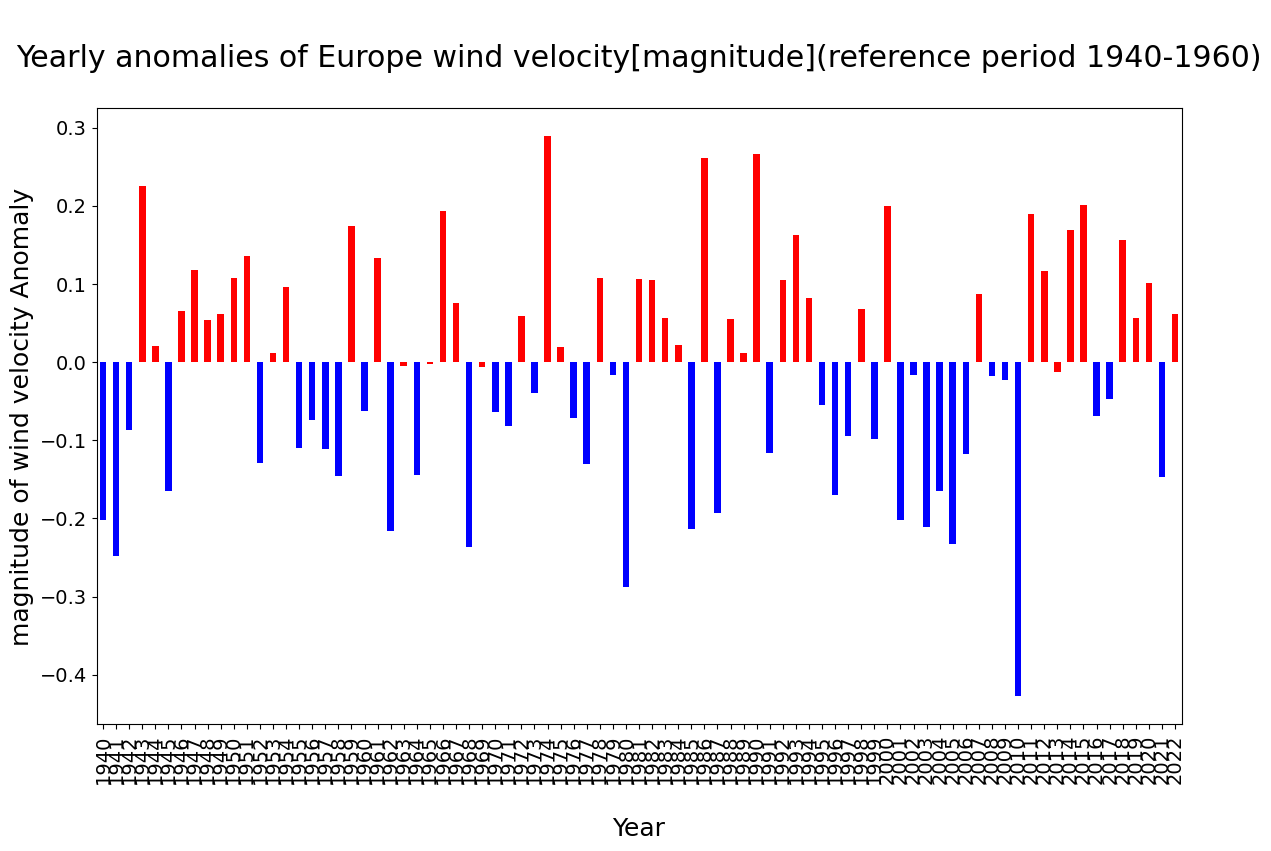

In [72]:
plt.rcParams.update({'font.size': 18}) # must set in top
dp['magnitude'].plot(
    figsize=(14,8),
    kind='bar',
    color=df.positive.map({True: 'red', False: 'blue'}),
    fontsize=14,
    xlabel='\nYear',
    ylabel='magnitude of wind velocity Anomaly',
    title='\nYearly anomalies of Europe wind velocity[magnitude](reference period 1940-1960)\n',
    )
plt.savefig(f'{DATADIR}Europe_uv10m_anom_bar(1940-1960).png')

### Euro for Renold's number

In [82]:
c = cdsapi.Client()
c.retrieve(
    'reanalysis-era5-pressure-levels-monthly-means',
#     'reanalysis-era5-single-levels-monthly-means',
    {
        'product_type': 'monthly_averaged_reanalysis',
        'variable': [
            'specific_humidity','temperature', 'u_component_of_wind',
            'v_component_of_wind', 'vertical_velocity',
        ],
        'pressure_level': '1000',
        'year': [
            '1940', '1941', '1942',
            '1943', '1944', '1945',
            '1946', '1947', '1948',
            '1949', '1950', '1951',
            '1952', '1953', '1954',
            '1955', '1956', '1957',
            '1958', '1959', '1960',
            '1961', '1962', '1963',
            '1964', '1965', '1966',
            '1967', '1968', '1969',
            '1970', '1971', '1972',
            '1973', '1974', '1975',
            '1976', '1977', '1978',
            '1979', '1980', '1981',
            '1982', '1983', '1984',
            '1985', '1986', '1987',
            '1988', '1989', '1990',
            '1991', '1992', '1993',
            '1994', '1995', '1996',
            '1997', '1998', '1999',
            '2000', '2001', '2002',
            '2003', '2004', '2005',
            '2006', '2007', '2008',
            '2009', '2010', '2011',
            '2012', '2013', '2014',
            '2015', '2016', '2017',
            '2018', '2019', '2020',
            '2021', '2022', 
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': '00:00',
        'area': [
            72, -25, 34,
            40,
        ],
        'format': 'netcdf',
    },
    f'{DATADIR}era5_monthly_re_eur.nc')
#     },
#     'download.nc')

2023-11-22 00:02:44,630 INFO Welcome to the CDS
2023-11-22 00:02:44,631 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels-monthly-means
2023-11-22 00:02:44,684 INFO Request is queued
2023-11-22 00:09:03,235 INFO Request is completed
2023-11-22 00:09:03,237 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data4/adaptor.mars.internal-1700611674.053317-15104-2-b762d28f-af81-49fd-a6f2-84e82a36e5a9.nc to ./era5_monthly_re_eur.nc (379.3M)
2023-11-22 00:10:17,438 INFO Download rate 5.1M/s                               


Result(content_length=397740608,content_type=application/x-netcdf,location=https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data4/adaptor.mars.internal-1700611674.053317-15104-2-b762d28f-af81-49fd-a6f2-84e82a36e5a9.nc)

In [73]:
# t2m = f'{DATADIR}era5_monthly_t2m_eur.nc'
tm = f'{DATADIR}era5_monthly_re_eur.nc'

In [74]:
# Create Xarray Dataset
ds1 = xr.open_dataset(tm)

In [75]:
ds1

<xarray.Dataset>
Dimensions:    (longitude: 261, latitude: 153, time: 996)
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
Data variables:
    q          (time, latitude, longitude) float32 ...
    t          (time, latitude, longitude) float32 ...
    u          (time, latitude, longitude) float32 ...
    v          (time, latitude, longitude) float32 ...
    w          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-22 00:08:11 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [76]:
ds_180_1 = ds1.assign_coords(longitude=(((ds1.longitude + 180) % 360) - 180)).sortby('longitude')

In [77]:
da1 = ds_180_1['t']

In [78]:
da1

<xarray.DataArray 't' (time: 996, latitude: 153, longitude: 261)>
[39773268 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [79]:
# da_degc1 = da1 - 273.15   # as there are some negtive values after converting the units, which affects the
#calculation of miu parameter,thus, keep K for now

In [80]:
# da_degc1 = da_degc1.assign_attrs(da1.attrs)
# da_degc1.attrs['units'] = '° C'

In [81]:
# da_degc1

In [82]:
# da_degc1[0,:,:].plot()

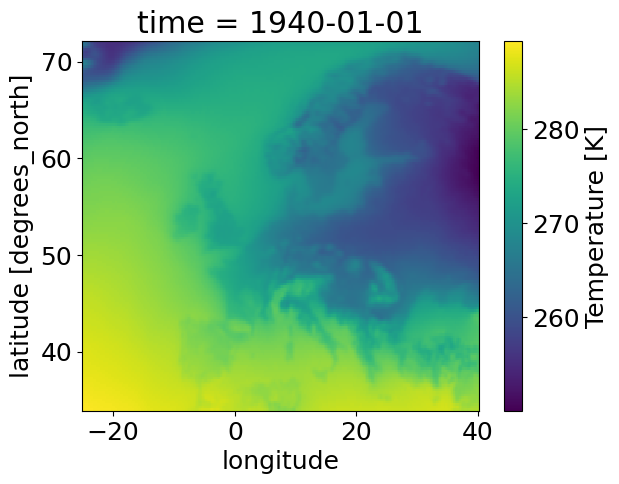

In [83]:
da1[0,:,:].plot()

In [84]:
beta = 1.458*10**(-6)   

In [85]:
s = 110.4 #K

In [86]:
da_den = da1+s

In [87]:
da_den

<xarray.DataArray 't' (time: 996, latitude: 153, longitude: 261)>
array([[[375.24097, 374.76285, 373.91882, ..., 378.08136, 377.9838 ,
         377.89597],
        [375.44394, 374.86823, 374.0125 , ..., 378.07355, 377.98965,
         377.91354],
        [372.9304 , 372.29227, 371.60437, ..., 378.0287 , 377.94867,
         377.87842],
        ...,
        [399.53412, 399.49313, 399.4541 , ..., 394.09238, 394.148  ,
         394.1636 ],
        [399.63562, 399.5966 , 399.5595 , ..., 394.63004, 394.59686,
         394.5305 ],
        [399.7156 , 399.67462, 399.6434 , ..., 394.9325 , 394.9325 ,
         394.82516]],

       [[377.00317, 376.5719 , 375.8586 , ..., 376.8295 , 376.8041 ,
         376.78265],
        [377.21686, 376.70654, 375.9757 , ..., 377.12805, 377.11636,
         377.0988 ],
        [374.66528, 374.09543, 373.46805, ..., 377.38663, 377.38467,
         377.3769 ],
...
        [402.39404, 402.33356, 402.2867 , ..., 402.77652, 402.91412,
         402.96484],
        [402.48184, 402.43893, 402.40576, ..., 403.10925, 403.24393,
         403.2693 ],
        [402.55212, 402.517  , 402.49747, ..., 403.28683, 403.4371 ,
         403.4859 ]],

       [[376.80704, 376.71533, 376.206  , ..., 382.32098, 382.29172,
         382.2605 ],
        [376.93488, 376.79144, 376.3621 , ..., 382.35806, 382.3327 ,
         382.30927],
        [375.45367, 375.0868 , 374.63602, ..., 382.37173, 382.35416,
         382.33856],
        ...,
        [400.83676, 400.80356, 400.78015, ..., 397.1182 , 397.1455 ,
         397.17673],
        [400.95383, 400.93433, 400.92065, ..., 397.5124 , 397.49286,
         397.43042],
        [401.07483, 401.05533, 401.05142, ..., 397.75632, 397.7407 ,
         397.649  ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01

In [88]:
da_fac = da1**(3/2)

In [89]:
da_fac

<xarray.DataArray 't' (time: 996, latitude: 153, longitude: 261)>
array([[[4310.005 , 4298.339 , 4277.7705, ..., 4379.527 , 4377.133 ,
         4374.978 ],
        [4314.9604, 4300.909 , 4280.052 , ..., 4379.3354, 4377.277 ,
         4375.409 ],
        [4253.7246, 4238.225 , 4221.5376, ..., 4378.2344, 4376.271 ,
         4374.5474],
        ...,
        [4916.4204, 4915.3755, 4914.38  , ..., 4778.2793, 4779.6846,
         4780.0786],
        [4919.01  , 4918.014 , 4917.0684, ..., 4791.869 , 4791.0303,
         4789.352 ],
        [4921.0503, 4920.005 , 4919.208 , ..., 4799.52  , 4799.52  ,
         4796.8047]],

       [[4353.0933, 4342.535 , 4325.091 , ..., 4348.8403, 4348.2188,
         4347.6934],
        [4358.328 , 4345.8306, 4327.953 , ..., 4356.1523, 4355.8657,
         4355.4355],
        [4295.9595, 4282.0713, 4266.799 , ..., 4362.4883, 4362.4404,
         4362.2495],
...
        [4989.5454, 4987.9956, 4986.795 , ..., 4999.3525, 5002.8823,
         5004.1836],
        [4991.7964, 4990.6963, 4989.846 , ..., 5007.889 , 5011.3457,
         5011.9966],
        [4993.598 , 4992.6978, 4992.197 , ..., 5012.447 , 5016.305 ,
         5017.558 ]],

       [[4348.2905, 4346.0454, 4333.5835, ..., 4483.9844, 4483.2607,
         4482.4883],
        [4351.421 , 4347.9087, 4337.4014, ..., 4484.902 , 4484.2744,
         4483.695 ],
        [4315.198 , 4306.2417, 4295.246 , ..., 4485.2397, 4484.805 ,
         4484.4194],
        ...,
        [4949.683 , 4948.8345, 4948.236 , ..., 4854.929 , 4855.623 ,
         4856.416 ],
        [4952.676 , 4952.1772, 4951.8276, ..., 4864.945 , 4864.448 ,
         4862.8613],
        [4955.77  , 4955.2715, 4955.1714, ..., 4871.146 , 4870.7485,
         4868.417 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01

In [90]:
da_miu = (beta*da_fac)/da_den

In [91]:
da_miu

<xarray.DataArray 't' (time: 996, latitude: 153, longitude: 261)>
array([[[1.6746539e-05, 1.6722517e-05, 1.6680064e-05, ...,
         1.6888825e-05, 1.6883951e-05, 1.6879561e-05],
        [1.6756729e-05, 1.6727814e-05, 1.6684779e-05, ...,
         1.6888436e-05, 1.6884245e-05, 1.6880440e-05],
        [1.6630263e-05, 1.6598067e-05, 1.6563319e-05, ...,
         1.6886195e-05, 1.6882195e-05, 1.6878683e-05],
        ...,
        [1.7941249e-05, 1.7939275e-05, 1.7937395e-05, ...,
         1.7677916e-05, 1.7680619e-05, 1.7681376e-05],
        [1.7946139e-05, 1.7944260e-05, 1.7942473e-05, ...,
         1.7704038e-05, 1.7702429e-05, 1.7699203e-05],
        [1.7949991e-05, 1.7948018e-05, 1.7946513e-05, ...,
         1.7718725e-05, 1.7718725e-05, 1.7713515e-05]],

       [[1.6834898e-05, 1.6813299e-05, 1.6777540e-05, ...,
         1.6826203e-05, 1.6824932e-05, 1.6823857e-05],
        [1.6845595e-05, 1.6820046e-05, 1.6783413e-05, ...,
         1.6841150e-05, 1.6840564e-05, 1.6839687e-05],
        [1.6717613e-05, 1.6688951e-05, 1.6657363e-05, ...,
         1.6854090e-05, 1.6853992e-05, 1.6853603e-05],
...
        [1.8078692e-05, 1.8075792e-05, 1.8073546e-05, ...,
         1.8097024e-05, 1.8103616e-05, 1.8106046e-05],
        [1.8082901e-05, 1.8080844e-05, 1.8079254e-05, ...,
         1.8112962e-05, 1.8119410e-05, 1.8120625e-05],
        [1.8086270e-05, 1.8084587e-05, 1.8083649e-05, ...,
         1.8121464e-05, 1.8128658e-05, 1.8130993e-05]],

       [[1.6825079e-05, 1.6820484e-05, 1.6794960e-05, ...,
         1.7099897e-05, 1.7098446e-05, 1.7096896e-05],
        [1.6831480e-05, 1.6824297e-05, 1.6802785e-05, ...,
         1.7101738e-05, 1.7100478e-05, 1.7099317e-05],
        [1.6757220e-05, 1.6738793e-05, 1.6716143e-05, ...,
         1.7102415e-05, 1.7101544e-05, 1.7100769e-05],
        ...,
        [1.8003933e-05, 1.8002336e-05, 1.8001210e-05, ...,
         1.7824636e-05, 1.7825956e-05, 1.7827466e-05],
        [1.8009559e-05, 1.8008623e-05, 1.8007964e-05, ...,
         1.7843695e-05, 1.7842749e-05, 1.7839731e-05],
        [1.8015375e-05, 1.8014438e-05, 1.8014249e-05, ...,
         1.7855482e-05, 1.7854727e-05, 1.7850296e-05]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01

In [92]:
da_u = ds_180_1['u']

In [93]:
da_v = ds_180_1['v']

In [94]:
da_w_pa = ds_180_1['w']

In [95]:
da_u

<xarray.DataArray 'u' (time: 996, latitude: 153, longitude: 261)>
[39773268 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
Attributes:
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind

In [96]:
da_w = -da_w_pa/(1.23*9.81)

In [97]:
da_sum_new = da_u**2 + da_v**2 + da_w**2

In [98]:
da_mag_new = np.sqrt(da_sum_new)

In [99]:
da_mag_new

<xarray.DataArray (time: 996, latitude: 153, longitude: 261)>
array([[[1.6297945 , 2.0422788 , 2.1147346 , ..., 5.8048058 ,
         5.849557  , 5.88795   ],
        [2.1834333 , 2.20345   , 1.9098945 , ..., 5.8287807 ,
         5.88884   , 5.941384  ],
        [2.0674837 , 2.002939  , 1.8118602 , ..., 5.9258657 ,
         6.001991  , 6.0600123 ],
        ...,
        [4.176167  , 4.1026063 , 4.0238004 , ..., 1.8025631 ,
         1.7134284 , 1.6357727 ],
        [4.0405536 , 3.9638047 , 3.8921666 , ..., 1.9620538 ,
         1.906926  , 1.8072397 ],
        [3.913263  , 3.8430858 , 3.7855392 , ..., 2.037689  ,
         2.0737736 , 1.9723178 ]],

       [[1.6659719 , 2.1468418 , 2.290841  , ..., 6.219409  ,
         6.24377   , 6.264633  ],
        [2.224028  , 2.2594485 , 1.97582   , ..., 6.2439227 ,
         6.285695  , 6.315999  ],
        [2.3393855 , 2.2758205 , 2.0196743 , ..., 6.1632457 ,
         6.207321  , 6.2436924 ],
...
        [2.407099  , 2.3262823 , 2.2663586 , ..., 0.73891604,
         0.6096228 , 0.54875016],
        [2.0741322 , 2.0097609 , 1.9480288 , ..., 0.80423254,
         0.7103374 , 0.6518054 ],
        [1.7316086 , 1.6802629 , 1.627446  , ..., 0.7807951 ,
         0.8086541 , 0.76520085]],

       [[1.7379943 , 2.1959496 , 2.3472104 , ..., 4.8928967 ,
         4.869651  , 4.845441  ],
        [2.4230766 , 2.4227815 , 2.1243718 , ..., 5.0398765 ,
         5.02449   , 5.0012097 ],
        [2.432367  , 2.3016882 , 1.9617552 , ..., 5.1347666 ,
         5.122324  , 5.0941863 ],
        ...,
        [6.5019484 , 6.456802  , 6.4156904 , ..., 0.5973528 ,
         0.5173419 , 0.521356  ],
        [6.4257708 , 6.3881326 , 6.3582945 , ..., 0.5019324 ,
         0.47930232, 0.4712158 ],
        [6.3355856 , 6.3201165 , 6.314858  , ..., 0.42617425,
         0.49336654, 0.49437356]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01

In [100]:
eps = 0.622

In [101]:
r_dry = 287.1

In [102]:
da_q = ds_180_1['q']

In [103]:
r_sp = (1+(1/eps-1)*da_q)*r_dry

In [104]:
r_sp

<xarray.DataArray 'q' (time: 996, latitude: 153, longitude: 261)>
array([[[287.19254, 287.1932 , 287.1947 , ..., 287.43256, 287.42926,
         287.4259 ],
        [287.19302, 287.1936 , 287.1943 , ..., 287.43207, 287.42868,
         287.42532],
        [287.1883 , 287.18802, 287.19272, ..., 287.43   , 287.42642,
         287.4231 ],
        ...,
        [288.66022, 288.6565 , 288.65405, ..., 287.66037, 287.65454,
         287.65012],
        [288.66565, 288.66208, 288.65924, ..., 287.65106, 287.6461 ,
         287.64215],
        [288.66943, 288.66678, 288.66452, ..., 287.64606, 287.64148,
         287.63757]],

       [[287.2025 , 287.20395, 287.20615, ..., 287.38403, 287.38434,
         287.38455],
        [287.2074 , 287.20883, 287.21014, ..., 287.38712, 287.3873 ,
         287.38745],
        [287.20566, 287.2071 , 287.2129 , ..., 287.39148, 287.3916 ,
         287.39166],
...
        [288.90277, 288.9011 , 288.89984, ..., 288.2935 , 288.285  ,
         288.2898 ],
        [288.90793, 288.90512, 288.90198, ..., 288.28644, 288.27844,
         288.2767 ],
        [288.9133 , 288.90982, 288.90625, ..., 288.28867, 288.27942,
         288.27023]],

       [[287.18567, 287.1862 , 287.18625, ..., 287.5439 , 287.5429 ,
         287.54156],
        [287.1847 , 287.18518, 287.18567, ..., 287.54587, 287.5445 ,
         287.54315],
        [287.1854 , 287.1881 , 287.19467, ..., 287.54715, 287.54617,
         287.5452 ],
        ...,
        [288.73636, 288.7428 , 288.74518, ..., 288.28256, 288.28888,
         288.29565],
        [288.75055, 288.75708, 288.7621 , ..., 288.27597, 288.28186,
         288.28674],
        [288.7675 , 288.77408, 288.77997, ..., 288.26483, 288.2701 ,
         288.27618]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01

In [105]:
rho = 1000/(da1*r_sp)

In [106]:
rho

<xarray.DataArray (time: 996, latitude: 153, longitude: 261)>
array([[[0.01314745, 0.0131712 , 0.01321332, ..., 0.01299708,
         0.01300197, 0.01300639],
        [0.01313736, 0.01316593, 0.01320864, ..., 0.01299748,
         0.01300171, 0.01300556],
        [0.01326336, 0.01329569, 0.01333049, ..., 0.01299976,
         0.01300381, 0.01300737],
        ...,
        [0.01198157, 0.01198342, 0.01198514, ..., 0.01225384,
         0.01225169, 0.0122512 ],
        [0.01197714, 0.0119789 , 0.01198056, ..., 0.01223106,
         0.0122327 , 0.01223572],
        [0.01197367, 0.01197548, 0.01197686, ..., 0.01221827,
         0.01221846, 0.01222324]],

       [[0.0130601 , 0.01308119, 0.01311624, ..., 0.01306036,
         0.01306159, 0.01306263],
        [0.01304942, 0.01307436, 0.01311028, ..., 0.0130456 ,
         0.01304616, 0.01304702],
        [0.01317549, 0.0132039 , 0.01323512, ..., 0.01303277,
         0.01303286, 0.01303323],
...
        [0.01185426, 0.01185678, 0.01185874, ..., 0.01186377,
         0.01185854, 0.01185628],
        [0.01185048, 0.01185234, 0.01185381, ..., 0.01185057,
         0.01184545, 0.0118445 ],
        [0.01184741, 0.01184898, 0.01184992, ..., 0.0118433 ,
         0.0118376 , 0.01183601]],

       [[0.01307048, 0.01307496, 0.01310001, ..., 0.01278949,
         0.01279091, 0.01279244],
        [0.01306426, 0.01307127, 0.01309235, ..., 0.01278765,
         0.01278891, 0.01279007],
        [0.01313723, 0.01315532, 0.01317746, ..., 0.01278696,
         0.01278783, 0.0127886 ],
        ...,
        [0.01192468, 0.01192578, 0.01192665, ..., 0.01209836,
         0.01209694, 0.01209534],
        [0.0119193 , 0.01191983, 0.01192018, ..., 0.01208202,
         0.0120826 , 0.01208502],
        [0.01191363, 0.01191416, 0.01191408, ..., 0.01207223,
         0.01207267, 0.01207627]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01

In [107]:
re = (rho*da_mag_new)/da_miu

In [108]:
re

<xarray.DataArray (time: 996, latitude: 153, longitude: 261)>
array([[[1279.5271 , 1608.5656 , 1675.2133 , ..., 4467.1875 ,
         4504.6196 , 4536.9062 ],
        [1711.8232 , 1734.266  , 1511.9834 , ..., 4485.8794 ,
         4534.701  , 4577.5493 ],
        [1648.9088 , 1604.4316 , 1458.2214 , ..., 4561.9995 ,
         4623.139  , 4670.0825 ],
        ...,
        [2788.9382 , 2740.538  , 2688.563  , ..., 1249.4868 ,
         1187.3109 , 1133.4064 ],
        [2696.6396 , 2646.085  , 2598.8796 , ..., 1355.5096 ,
         1317.7203 , 1249.3717 ],
        [2610.3706 , 2564.2268 , 2526.3337 , ..., 1405.1256 ,
         1430.0311 , 1361.0011 ]],

       [[1292.4199 , 1670.2999 , 1790.9198 , ..., 4827.4526 ,
         4847.185  , 4864.08   ],
        [1722.8403 , 1756.2876 , 1543.4016 , ..., 4836.707  ,
         4869.4443 , 4893.4956 ],
        [1843.7178 , 1800.575  , 1604.734  , ..., 4765.854  ,
         4799.9976 , 4828.374  ],
...
        [1578.3425 , 1525.9204 , 1487.0433 , ...,  484.40723,
          399.32544,  359.33508],
        [1359.2655 , 1317.4365 , 1277.2412 , ...,  526.1766 ,
          464.37863,  426.05084],
        [1134.2902 , 1100.9042 , 1066.4385 , ...,  510.2892 ,
          528.0328 ,  499.5272 ]],

       [[1350.1525 , 1706.963  , 1830.8157 , ..., 3659.5327 ,
         3642.8604 , 3625.5112 ],
        [1880.7432 , 1882.3267 , 1655.262  , ..., 3768.5176 ,
         3757.6582 , 3740.841  ],
        [1906.9132 , 1808.9377 , 1546.4657 , ..., 3839.109  ,
         3830.2617 , 3809.6252 ],
        ...,
        [4306.486  , 4277.357  , 4250.696  , ...,  405.44934,
          351.07535,  353.72256],
        [4252.778  , 4228.276  , 4208.805  , ...,  339.86002,
          324.56976,  319.2118 ],
        [4189.746  , 4179.919  , 4176.456  , ...,  288.13977,
          333.59515,  334.4587 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01

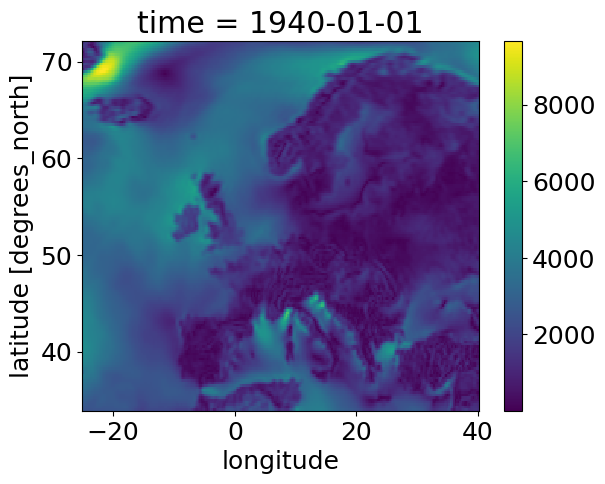

In [109]:
re[0,:,:].plot()

In [110]:
re_yearly_mean = re.groupby('time.year').mean(keep_attrs=True)

In [111]:
ref_re = re_yearly_mean.where((re_yearly_mean.year > 1990) & (re_yearly_mean.year < 2021), drop=True)

In [112]:
ref_re_mean = ref_re.mean(dim="year", keep_attrs=True)

In [113]:
ref_re_anom = re_yearly_mean - ref_re_mean

In [114]:
print(ref_re_mean)

<xarray.DataArray (latitude: 153, longitude: 261)>
array([[ 960.04425, 1226.1556 , 1300.5907 , ..., 2196.0244 , 2198.5608 ,
        2201.3538 ],
       [1431.4624 , 1418.519  , 1236.4459 , ..., 2199.7026 , 2206.4978 ,
        2211.3333 ],
       [1446.9921 , 1423.4065 , 1316.9012 , ..., 2202.306  , 2211.3306 ,
        2216.0356 ],
       ...,
       [2254.2778 , 2278.667  , 2296.2983 , ..., 1478.6316 , 1503.0786 ,
        1552.1257 ],
       [2276.1677 , 2297.868  , 2315.831  , ..., 1513.7614 , 1529.457  ,
        1516.1403 ],
       [2299.1104 , 2321.5867 , 2342.1992 , ..., 1480.1843 , 1518.8695 ,
        1497.3103 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0


In [115]:
re_2022 = re_yearly_mean.sel(year=2022)

In [116]:
re_anom_2022 = re_2022 - ref_re_mean

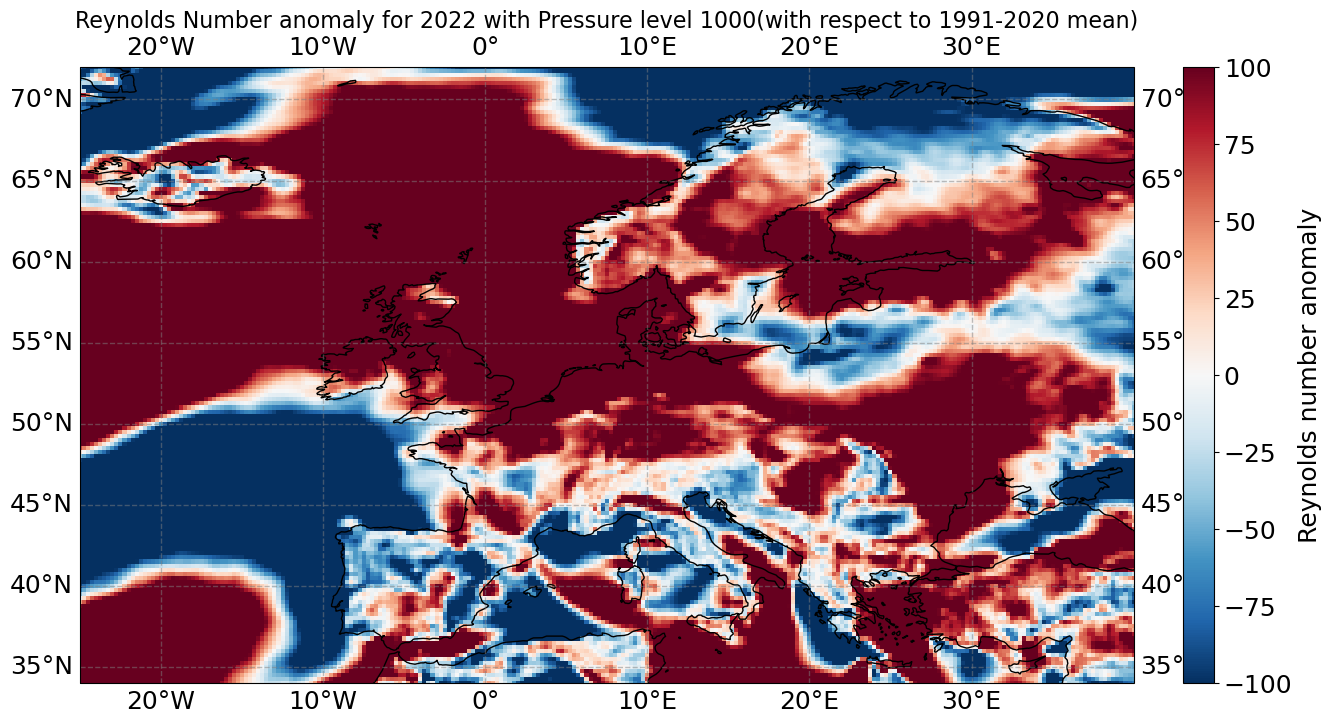

In [117]:
# create the figure panel and the map using the Cartopy PlateCarree projection
fig, ax = plt.subplots(1, 1, figsize = (16, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data
im = plt.pcolormesh(re_anom_2022.longitude, re_anom_2022.latitude, re_anom_2022, cmap='RdBu_r', vmin=-100, vmax=100) 

# Set the figure title, add lat/lon grid and coastlines
ax.set_title('Reynolds Number anomaly for 2022 with Pressure level 1000(with respect to 1991-2020 mean)', fontsize=16)
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') 
ax.coastlines(color='black')
ax.set_extent([-25, 40, 34, 72], crs=ccrs.PlateCarree())


# Specify the colourbar
cbar = plt.colorbar(im,fraction=0.05, pad=0.04)
cbar.set_label('Reynolds number anomaly') 

# Save the figure
fig.savefig(f'{DATADIR}new2_2022_rey_anomaly_eur.png')

In [118]:
re_1960 = re_yearly_mean.sel(year=1960)

In [119]:
re_anom_1960 = re_1960 - ref_re_mean

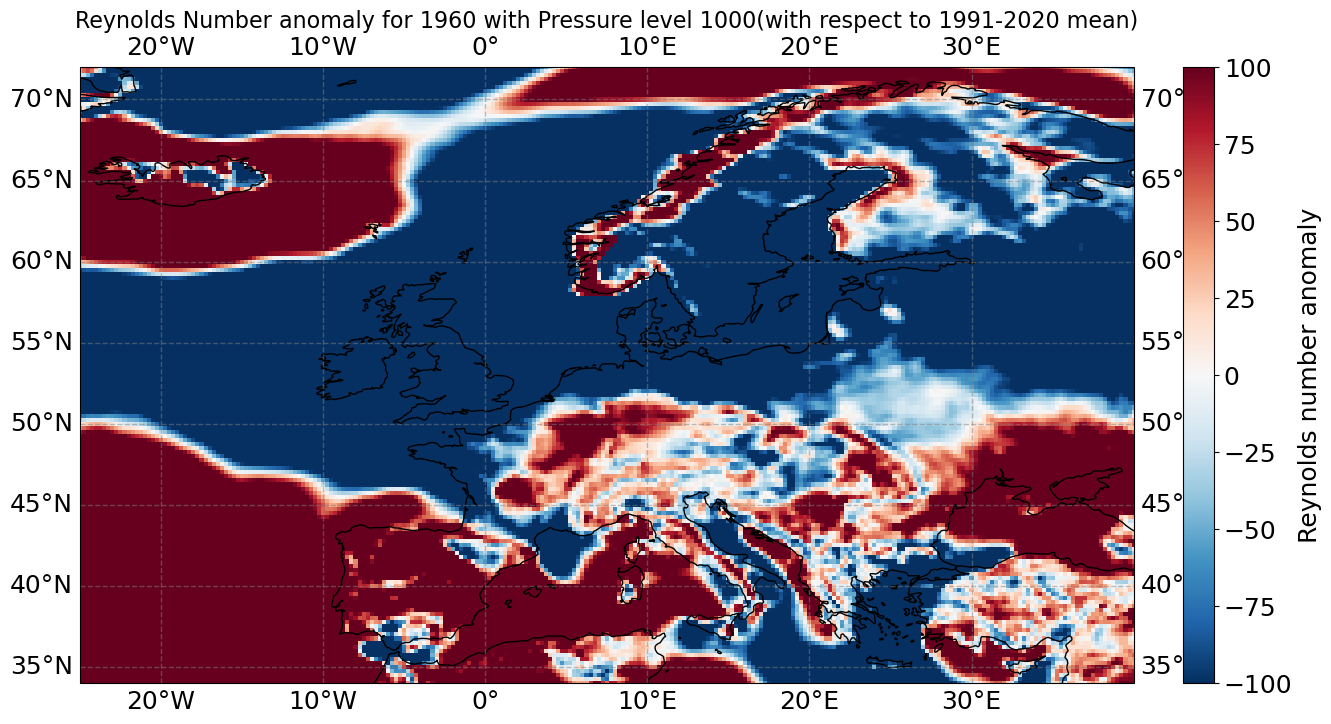

In [120]:
# create the figure panel and the map using the Cartopy PlateCarree projection
fig, ax = plt.subplots(1, 1, figsize = (16, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data
im = plt.pcolormesh(re_anom_1960.longitude, re_anom_1960.latitude, re_anom_1960, cmap='RdBu_r', vmin=-100, vmax=100) 

# Set the figure title, add lat/lon grid and coastlines
ax.set_title('Reynolds Number anomaly for 1960 with Pressure level 1000(with respect to 1991-2020 mean)', fontsize=16)
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') 
ax.coastlines(color='black')
ax.set_extent([-25, 40, 34, 72], crs=ccrs.PlateCarree())

# Specify the colourbar
cbar = plt.colorbar(im,fraction=0.05, pad=0.04)
cbar.set_label('Reynolds number anomaly') 

# Save the figure
fig.savefig(f'{DATADIR}new2_1960_re_anomaly_eur.png')

In [121]:
# weights = np.cos(np.deg2rad(da_degc.latitude))
# weights.name = "weights"
re_weighted = re.weighted(weights)
re_mean = re_weighted.mean(["longitude", "latitude"])

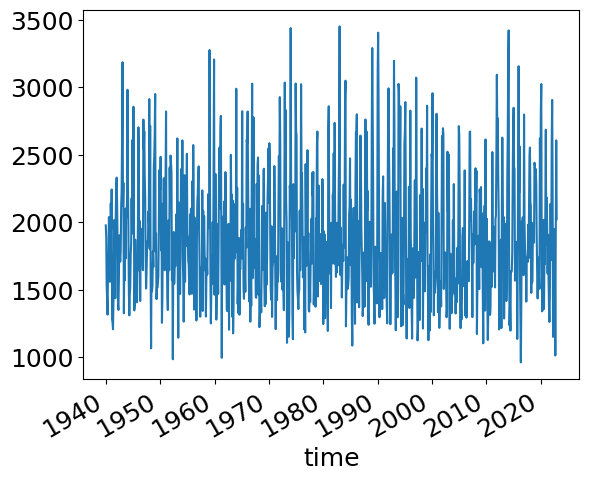

In [169]:
re_mean.plot()

In [170]:
re_yearly = re_mean.groupby('time.year').mean()

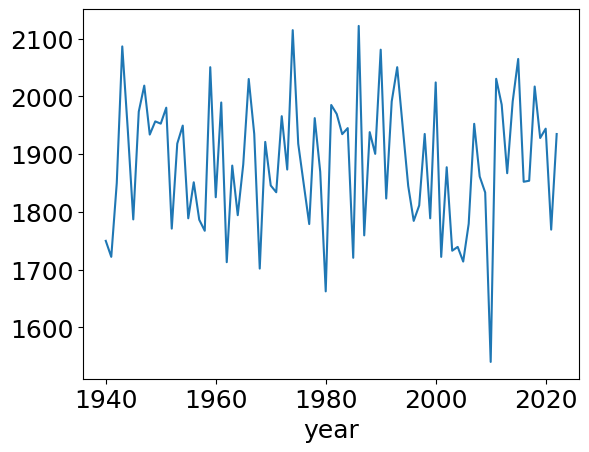

In [171]:
re_yearly.plot()

In [182]:
re_subset = re_yearly.where((re_yearly.year > 1990) & (re_yearly.year < 2021), drop=True)
re_clim = re_subset.mean()
re_anom = re_yearly - re_clim

In [183]:
re_anom_n = re_anom.rename("Renolds number")

In [184]:
re_anom_n

<xarray.DataArray 'Renolds number' (year: 83)>
array([-126.38403  , -154.08472  ,  -26.243774 ,  210.28992  ,
         66.53345  ,  -89.276    ,   97.30359  ,  142.37695  ,
         57.651855 ,   80.44849  ,   76.548706 ,  104.21924  ,
       -105.20337  ,   41.968506 ,   73.19849  ,  -87.33911  ,
        -24.989502 ,  -89.86145  , -108.95459  ,  174.3092   ,
        -50.90393  ,  113.196655 , -163.3396   ,    3.9387207,
        -81.950806 ,    5.929077 ,  153.87354  ,   58.69995  ,
       -174.396    ,   44.964844 ,  -30.52417  ,  -42.259277 ,
         89.4895   ,   -2.8901367,  238.45813  ,   41.770508 ,
        -28.073364 ,  -97.301025 ,   86.12976  ,   -6.7927246,
       -213.87549  ,  108.877686 ,   93.29443  ,   58.345093 ,
         68.841064 , -155.70813  ,  245.76941  , -116.91455  ,
         61.847656 ,   24.26941  ,  204.62708  ,  -53.095947 ,
        114.95703  ,  174.31067  ,   70.864746 ,  -31.281738 ,
        -91.82959  ,  -65.075806 ,   58.688232 ,  -87.37756  ,
        147.92126  , -154.15051  ,    1.0742188, -143.44922  ,
       -136.8263   , -162.26807  ,  -96.905396 ,   76.282104 ,
        -14.987915 ,  -42.65503  , -336.02222  ,  154.22021  ,
        109.38269  ,   -9.268799 ,  114.864624 ,  188.58191  ,
        -24.07373  ,  -22.323486 ,  140.85046  ,   51.700928 ,
         67.893555 , -106.93323  ,   58.604248 ], dtype=float32)
Coordinates:
  * year     (year) int64 1940 1941 1942 1943 1944 ... 2018 2019 2020 2021 2022

In [185]:
df = re_anom_n.to_dataframe()
df['positive'] = df['Renolds number'] > 0
df.head() # show only first five rows

Renolds number  positive
year                          
1940     -126.384033     False
1941     -154.084717     False
1942      -26.243774     False
1943      210.289917      True
1944       66.533447      True

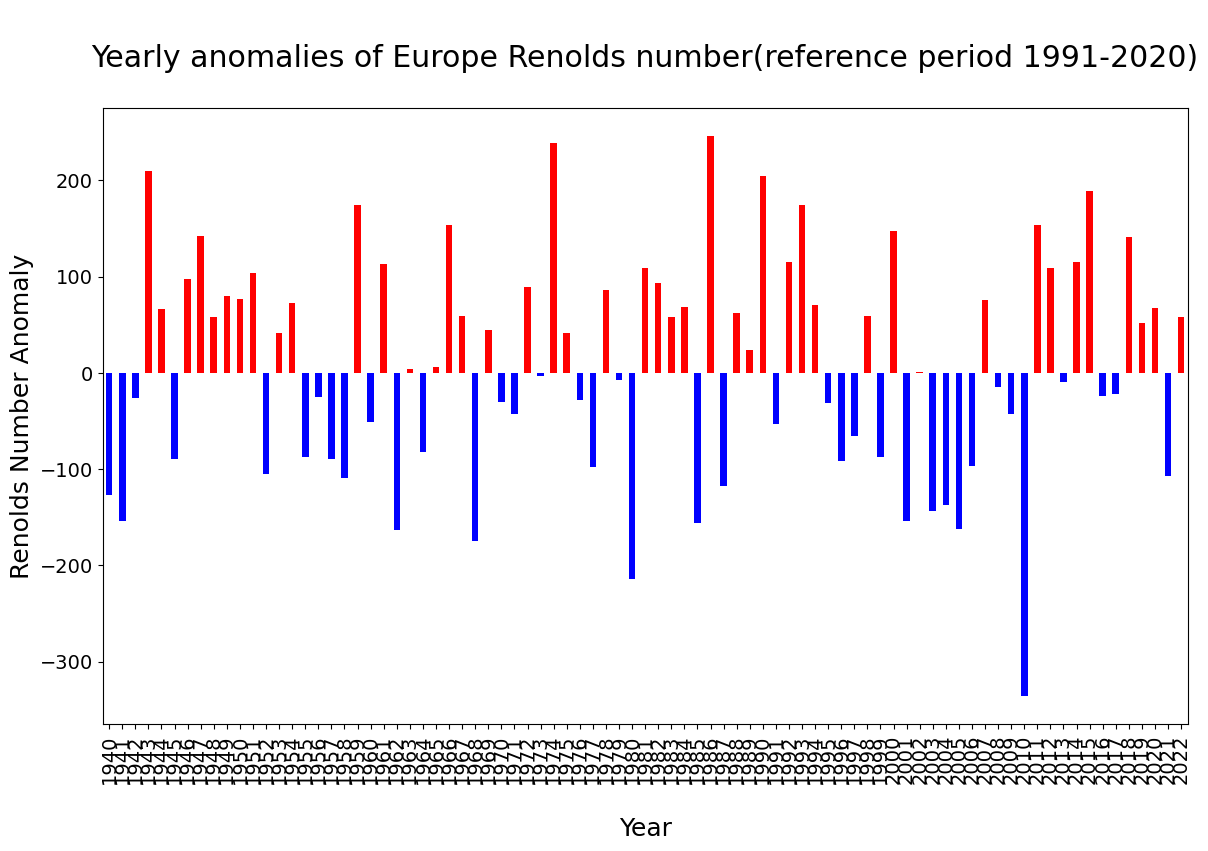

In [187]:
plt.rcParams.update({'font.size': 18}) # must set in top
df['Renolds number'].plot(
    figsize=(14,8),
    kind='bar',
    color=df.positive.map({True: 'red', False: 'blue'}),
    fontsize=14,
    xlabel='\nYear',
    ylabel='Renolds Number Anomaly',
    title='\nYearly anomalies of Europe Renolds number(reference period 1991-2020)\n',
    )
plt.savefig(f'{DATADIR}Reynold_number_anom_bar.png')

In [177]:
re_subset1 = re_yearly.where((re_yearly.year > 1940) & (re_yearly.year < 1961), drop=True)
re_clim1 = re_subset1.mean()
re_anom1 = re_yearly - re_clim1

In [178]:
re_anom_n1 = re_anom1.rename("Renolds number")

In [179]:
sf = re_anom_n1.to_dataframe()
sf['positive'] = sf['Renolds number'] > 0
sf.head() # show only first five rows

Renolds number  positive
year                          
1940     -145.783691     False
1941     -173.484375     False
1942      -45.643433     False
1943      190.890259      True
1944       47.133789      True

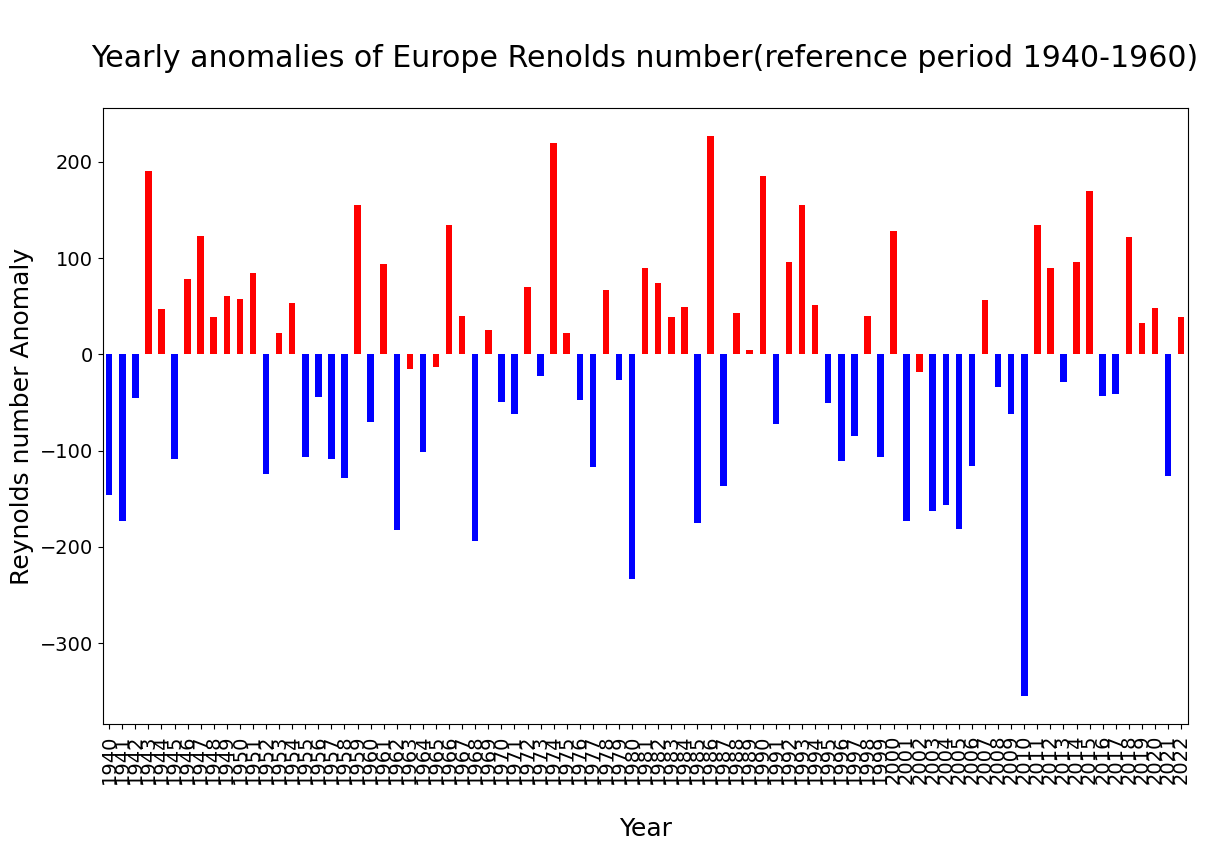

In [181]:
plt.rcParams.update({'font.size': 18}) # must set in top
sf['Renolds number'].plot(
    figsize=(14,8),
    kind='bar',
    color=df.positive.map({True: 'red', False: 'blue'}),
    fontsize=14,
    xlabel='\nYear',
    ylabel='Reynolds number Anomaly',
    title='\nYearly anomalies of Europe Renolds number(reference period 1940-1960)\n',
    )
plt.savefig(f'{DATADIR}Europe_Renolds_number_anom_bar_1940-1960.png')